In [1]:
import numpy as np
import pylab as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline

# Решающие деревья

**Решающие деревья** — логический алгоритм классификации/регрессии.

Почему «логический»? Ранее, например, при изучении линейных моделей, мы строили некоторый алгоритм, однако не имели возможности интерпретировать его на естественном языке. Действительно, какой смысл имеет алгоритм $a(x) = 0.2 \cdot x^1 -12.1 x^2 + 10.2$? В случае решающих деревьев такая возможность есть.

Решающее дерево — это двоичное дерево, у которого:
* в каждой внутренней вершине записано некоторое условие;
* в каждом листе записана метка класса (в случае классификации) или прогноз (в случае регрессии).

Процесс классификации/восстановления регрессии выглядит как проход от корня дерева вниз путём поочередной проверки условий, записанных во внутренних вершинах: если условие выполняется, необходимо перейти по ребру влево вниз, если нет — вправо вниз.

Например, решающее дерево для определения судьбы пассажиров Титаника могло бы выглядеть так:
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png">

Наиболее часто в качестве условий во внутренних вершинах используются следующие варианты:
* [$x^j = t$]
* [$x^j \le t$]
* [$x^j > t$]


Например: [age $\le$ 30], [этаж = 9].

Каким образом в геометрическом смысле условие в некоторой внутренней вершине разделяет объекты на 2 части?

Представим график в осях Oх и Oу. Как выглядит график y=c? Область y < c? График x = c? Область x >= c?

Давайте посмотрим, как выглядят разделяющие поверхности решающих деревьев для некоторых выборок специального вида. Решающие деревья в sklearn реализованы через классы [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) и [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor).

In [2]:
def plot_decision_boundary(clf, X, transform, y):
    clf.fit(transform(X), y)
    plt.figure(figsize=(8, 8))
    xx1 = np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.05)
    xx2 = np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.05)

    X1, X2 = np.meshgrid(xx1, xx2)
    Z = np.empty(X1.shape)
    Z = clf.predict(transform(np.c_[X1.ravel(), X2.ravel()]))
    Z = Z.reshape(X1.shape)
    plt.contourf(X1, X2, Z, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

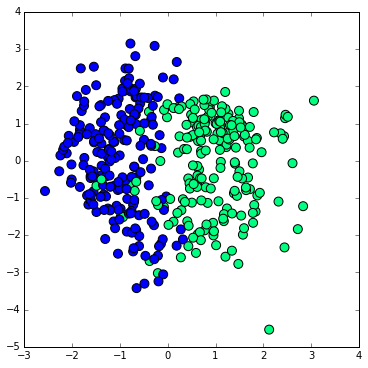

In [3]:
from sklearn.datasets import make_classification

X_clf, y_clf = make_classification(400, n_features=2, n_redundant=0, n_classes=2, random_state=42)
plt.figure(figsize=(6, 6))
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, cmap='winter', s=80)

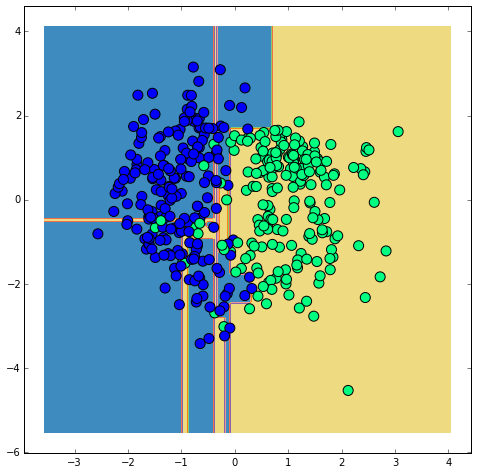

In [4]:
plot_decision_boundary(DecisionTreeClassifier(random_state=42), X_clf, lambda x: x, y_clf)

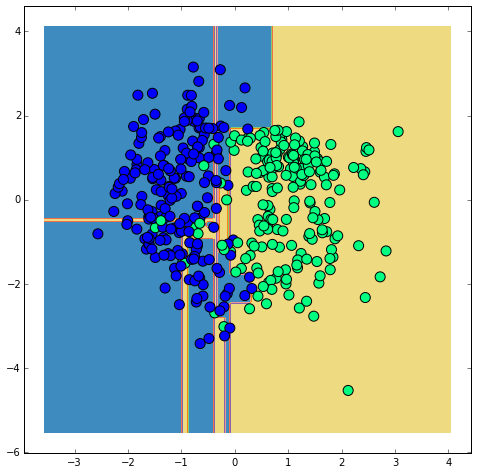

In [5]:
plot_decision_boundary(DecisionTreeClassifier(random_state=42, min_samples_leaf = 1),
                       X_clf, lambda x: x, y_clf)

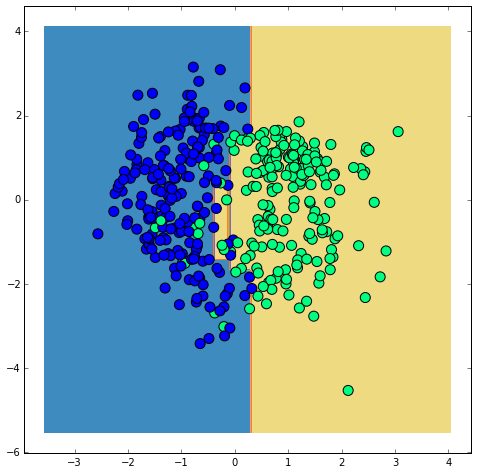

In [6]:
plot_decision_boundary(DecisionTreeClassifier(random_state=42, min_samples_leaf=5),
                       X_clf, lambda x: x, y_clf)

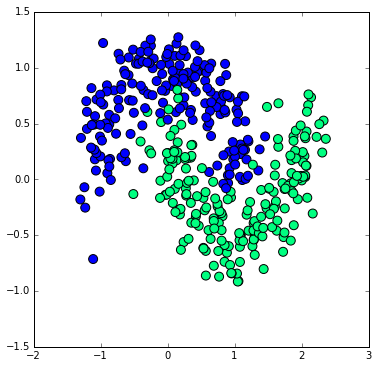

In [7]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(400, noise=0.2, random_state=42)
plt.figure(figsize=(6, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='winter', s=80)

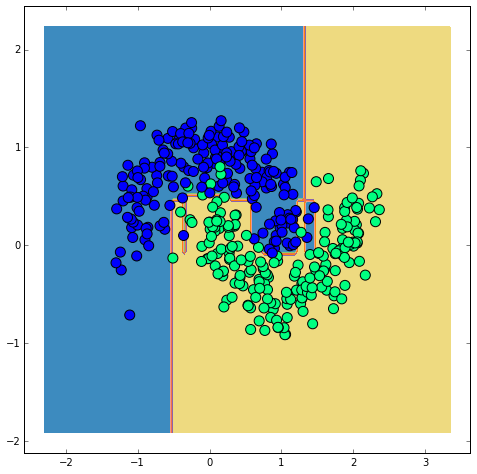

In [8]:
plot_decision_boundary(DecisionTreeClassifier(random_state=42), X_moons, lambda x: x, y_moons)

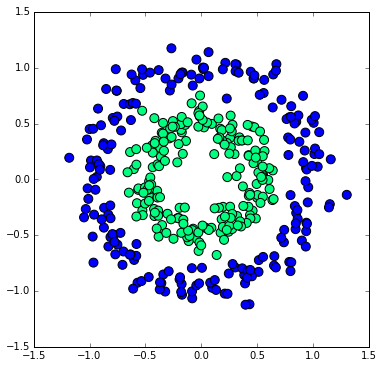

In [12]:
from sklearn.datasets import make_circles

X_circles, y_circles = make_circles(400, noise=0.1, factor=0.5, random_state=42)
plt.figure(figsize=(6, 6))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='winter', s=80)

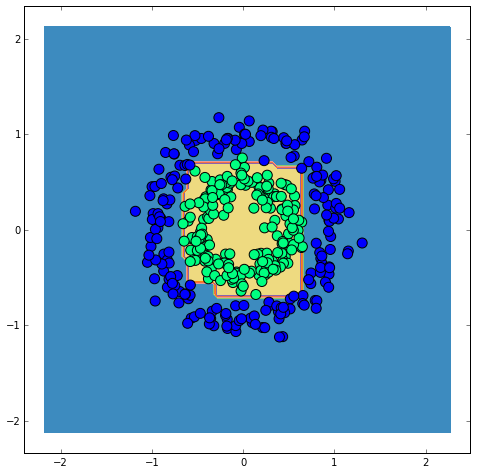

In [13]:
plot_decision_boundary(DecisionTreeClassifier(random_state=42), X_circles, lambda x: x, y_circles)

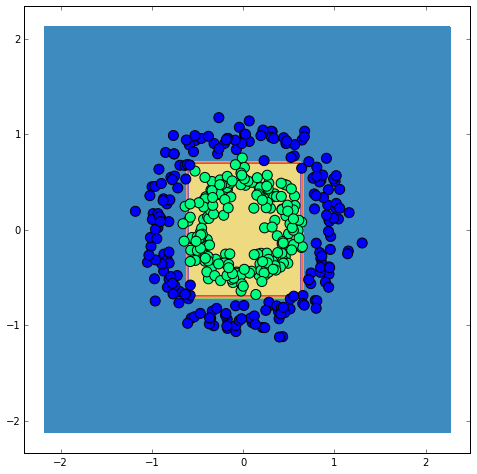

In [14]:
plot_decision_boundary(DecisionTreeClassifier(random_state=42, max_depth=4), X_circles, lambda x: x, y_circles)

По изображениям видно, что решающие деревья обладают меньшей обобщающей способностью (в сравнении с линейными методами), так как иногда решение формируется исходя всего из одного объекта.

В случае решения задачи регрессии в листьях находятся не метки класса, а значение целевой переменной. Поскольку в каждой внутренней вершине разбиение выборки происходит аналогично случаю классификации, восставновленная зависимость получается кусочно-постоянной. Давайте убедимся в этом.

Загрузим данные о количестве арендованных велосипедов в зависимости от календарных и погодных условий каждого дня:

In [15]:
bikes = pd.read_csv('bikes_rent.csv')
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


Будем рассматривать одномерную выборку, выбрав только признак temp (температура воздуха):

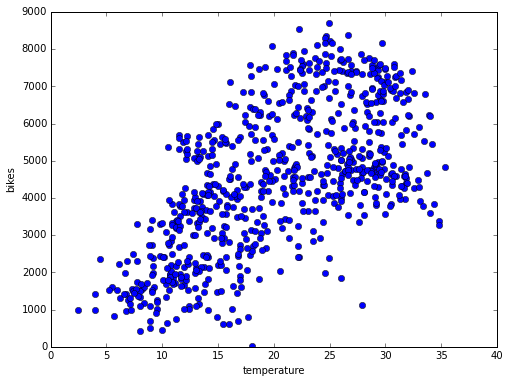

In [16]:
plt.figure(figsize=(8,6))
plt.plot(bikes['temp'], bikes['cnt'], 'o')
plt.xlabel('temperature')
plt.ylabel('bikes')

In [17]:
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(np.array([bikes['temp']]).T, bikes['cnt'])

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=None,
           splitter='best')

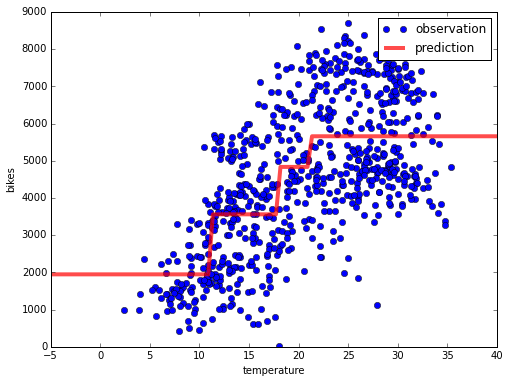

In [18]:
xx = np.array([np.linspace(-5, 40, 100)]).T

plt.figure(figsize=(8,6))
plt.plot(bikes['temp'], bikes['cnt'], 'o', label='observation')
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, color = 'r', label='prediction')
plt.xlabel('temperature')
plt.ylabel('bikes')
plt.legend()
plt.show()

## Обучение решающих деревьев

Теперь, когда мы изучили вид модели, даайте подумаем, как мы будем её обучать.

Один из способов обучения решающего дерева — жадный алгоритм построения. Алгоритм является рекурсивным, т.е. построение дерева начинается с корня, а далее выполняются следующие действия:
* если в вершине присутствуют только объекты одного класса, необходимо создать листовую вершину с меткой этого класса и вернуть её;
* в противном случае выбирается некоторое условие для текущей внутренней вершины, т.е. разбиение всех объектов в этой вершине на 2 группы;
* алгоритм рекурсивно запускается для 2 выборок:
    * для тех объектов, на которых выбранное условие выполняется — полученное дерево будет левым поддеревом текущей вершины;
    * для тех объектов, на которых выбранное условие не выполняется — полученное дерево будет правым поддеревом текущей вершины.


**Задача на построение решающего дерева.**

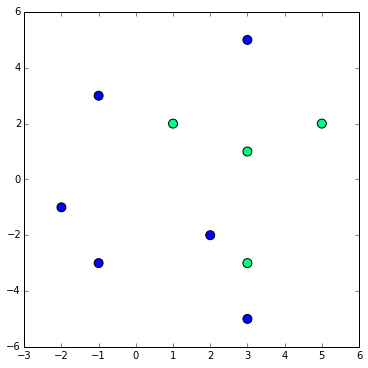

In [19]:
X_clf = np.array(
        [[-2, -1],
         [-1, -3],
         [-1,  3],
         [ 2, -2],
         [ 3,  5],
         [ 3, -5],
         [ 1,  2],
         [ 3,  1],
         [ 3, -3],
         [ 5,  2]])
y_clf = [0] * 6 + [1] * 4

plt.figure(figsize=(6, 6))
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, cmap='winter', s=80)

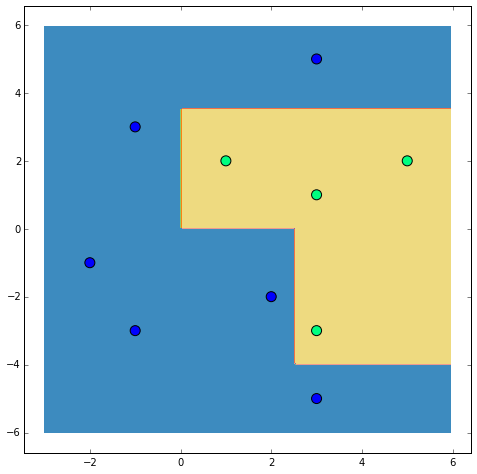

In [20]:
plot_decision_boundary(DecisionTreeClassifier(random_state=42), X_clf, lambda x: x, y_clf)

Алгоритм обучения решающего дерева интуитивно понятен, однако как выбирать условие, по которому объекты в вершине разбиваются на 2 группы? Нам бы хотелось, чтобы:
* объекты из двух разных групп были непохожи;
* объекты из одной группы были похожи.

Рассмотрим некоторую вершину $v$ и выборку $U$, состоящую из всех объектов, "дошедших" до этой вершины. Рассмотрим некоторое произвольное условие $\beta$, которое мы могли бы поставить в эту вершину, и части $U_0$ (объекты, для которых $\beta$ не выполняется) и $U_1$ (для которых $\beta$ выполняется), на которые это условие разбивает выборку $U$.

Для каждого из возможных условий $\beta$ можно оценить, насколько хорошим является его разбиение на 2 группы: $U = U_0 \bigcup U_1$

То есть можно определить функцию, зависящую от условия и выборки, $I(\beta, U)$. При этом чем выше её значение, тем лучше условие $\beta$ делит выборку $U$ на 2 части. А в вершине v при построении решающего дерева можно выбрать то условие, которое позволяет достичь наибольшего значения этой функции, т.е. $\arg \max_{\beta} I(\beta, U)$.

Как именно задавать эту функцию — тема сегодняшней лекции и следующего семинара.